## 001. ETL (Extracción, Transformación y Carga)
    - Cargar el archivo inicial
    - Limpiar los datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob as glob
import missingno as msno

In [2]:
f= "../data/001_raw/ESOLMET-IER_TablaGeneral.dat"
esolmet18 = pd.read_csv(f, 
                usecols=[0,2,3,4,6,7,8,9], # las columnas que ocupo
                skiprows=[0,2,3], # quité filas innecesairas
                encoding="ANSI", #tipo de codificación
                index_col=0,
                parse_dates=True, #para convertir las columnas de un DataFrame que contienen fechas
                low_memory=False # Para que lea el archivo completo, después analiza las columnas completas
                        #y decide que tipo de dato es más apropiado.
                )
#Es porque esas dos variables eran objetos y no podria manipularlas. 
esolmet18['I_dir_Avg'] = pd.to_numeric(esolmet18['I_dir_Avg'], errors='coerce')
#Coerce ayuda a gestionar los errores de conversión asignando valores que no se pueden convertir a Nans o NAT
esolmet18['RH'] = pd.to_numeric(esolmet18['RH'], errors='coerce') 
esolmet18= esolmet18.drop_duplicates()
esolmet18[esolmet18.duplicated()]
esolmet18 = esolmet18[~esolmet18.index.duplicated()]
esolmet18.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70201 entries, 2017-07-31 12:20:00 to 2018-12-10 17:40:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   I_dir_Avg     70200 non-null  float64
 1   I_glo_Avg     70201 non-null  float64
 2   I_dif_Avg     70201 non-null  float64
 3   AirTC_Avg     70201 non-null  float64
 4   RH            70194 non-null  float64
 5   WS_ms_Avg     70201 non-null  float64
 6   CS106_PB_Avg  70201 non-null  float64
dtypes: float64(7)
memory usage: 6.3 MB


In [3]:
esolmet18.dtypes

I_dir_Avg       float64
I_glo_Avg       float64
I_dif_Avg       float64
AirTC_Avg       float64
RH              float64
WS_ms_Avg       float64
CS106_PB_Avg    float64
dtype: object

In [4]:
esolmet18

,I_dir_Avg,I_glo_Avg,I_dif_Avg,AirTC_Avg,RH,WS_ms_Avg,CS106_PB_Avg
TIMESTAMP,,,,,,,
2017-07-31 12:20:00,699.70,1029.00,175.50,27.31,48.58,2.107,878.0034
2017-07-31 12:30:00,694.80,1036.00,183.20,27.09,46.27,2.107,877.8430
2017-07-31 12:40:00,682.20,1051.00,196.20,28.60,40.58,1.183,877.8953
2017-07-31 12:50:00,664.30,1071.00,209.60,30.09,46.64,1.282,877.7523
2017-07-31 13:00:00,664.70,1075.00,213.20,28.48,45.41,2.744,877.6328
...,...,...,...,...,...,...,...
2018-12-10 17:00:00,178.20,163.00,103.10,26.98,42.14,1.883,877.5112
2018-12-10 17:10:00,33.32,69.44,53.67,26.38,43.41,1.098,877.3846
2018-12-10 17:20:00,17.25,43.41,34.45,25.94,43.78,1.430,877.6138


In [5]:
dfv= "../data/001_raw/ESOLMET-IER_Viento_Vaisala.dat"
viento= pd.read_csv(dfv, 
                usecols=["TIMESTAMP", "DvPro"], 
                skiprows=[0,2, 3], #0,2,3
                encoding="ANSI", 
                index_col=0,
                parse_dates=True
                )
viento.index.duplicated()
viento['DvPro'] = pd.to_numeric(viento['DvPro'], errors='coerce')
viento = viento.resample("10Min").mean(numeric_only=True) ###
viento.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92617 entries, 2017-03-07 13:40:00 to 2018-12-10 17:40:00
Freq: 10min
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DvPro   37031 non-null  float64
dtypes: float64(1)
memory usage: 1.4 MB


In [6]:
viento[viento.index.duplicated()]

,DvPro
TIMESTAMP,


In [7]:
viento

,DvPro
TIMESTAMP,
2017-03-07 13:40:00,91.5
2017-03-07 13:50:00,191.4
2017-03-07 14:00:00,73.6
2017-03-07 14:10:00,118.5
2017-03-07 14:20:00,136.9
...,...
2018-12-10 17:00:00,NaN
2018-12-10 17:10:00,NaN
2018-12-10 17:20:00,NaN


In [8]:
esoviento= pd.concat([esolmet18, viento], axis=1)
esoviento

,I_dir_Avg,I_glo_Avg,I_dif_Avg,AirTC_Avg,RH,WS_ms_Avg,CS106_PB_Avg,DvPro
TIMESTAMP,,,,,,,,
2017-03-07 13:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.5
2017-03-07 13:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,191.4
2017-03-07 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.6
2017-03-07 14:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118.5
2017-03-07 14:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.9
...,...,...,...,...,...,...,...,...
2018-12-10 17:00:00,178.20,163.00,103.10,26.98,42.14,1.883,877.5112,NaN
2018-12-10 17:10:00,33.32,69.44,53.67,26.38,43.41,1.098,877.3846,NaN
2018-12-10 17:20:00,17.25,43.41,34.45,25.94,43.78,1.430,877.6138,NaN


In [9]:
#Ahora seleccionar el periodo de 1 año.
#
esolmet18 = esolmet18["2017-11-01":"2018-11-01"]
esolmet_a = esoviento["2017-11-01":"2018-11-01"]
esolmet_a

,I_dir_Avg,I_glo_Avg,I_dif_Avg,AirTC_Avg,RH,WS_ms_Avg,CS106_PB_Avg,DvPro
TIMESTAMP,,,,,,,,
2017-11-01 00:00:00,0.000,0.0,0.0,21.02,66.28,1.158,876.6721,NaN
2017-11-01 00:10:00,0.000,0.0,0.0,20.99,64.07,1.301,876.7043,NaN
2017-11-01 00:20:00,0.090,0.0,0.0,21.24,64.13,1.148,876.4832,NaN
2017-11-01 00:30:00,0.000,0.0,0.0,20.94,67.71,1.496,876.4512,NaN
2017-11-01 00:40:00,0.042,0.0,0.0,21.01,64.30,1.037,876.3698,NaN
...,...,...,...,...,...,...,...,...
2018-11-01 23:10:00,0.277,0.0,0.0,21.28,82.60,0.205,877.1297,NaN
2018-11-01 23:20:00,0.010,0.0,0.0,21.22,83.60,0.000,877.1385,NaN
2018-11-01 23:30:00,0.130,0.0,0.0,21.02,83.50,0.198,877.1710,NaN


In [10]:
esolmet_a.isna().head(20) #Nos sirve para ver  si hay Nans

,I_dir_Avg,I_glo_Avg,I_dif_Avg,AirTC_Avg,RH,WS_ms_Avg,CS106_PB_Avg,DvPro
TIMESTAMP,,,,,,,,
2017-11-01 00:00:00,False,False,False,False,False,False,False,True
2017-11-01 00:10:00,False,False,False,False,False,False,False,True
2017-11-01 00:20:00,False,False,False,False,False,False,False,True
2017-11-01 00:30:00,False,False,False,False,False,False,False,True
2017-11-01 00:40:00,False,False,False,False,False,False,False,True
2017-11-01 00:50:00,False,False,False,False,False,False,False,True
2017-11-01 01:00:00,False,False,False,False,False,False,False,True
2017-11-01 01:10:00,False,False,False,False,False,False,False,True
2017-11-01 01:20:00,False,False,False,False,False,False,False,True


<Axes: >

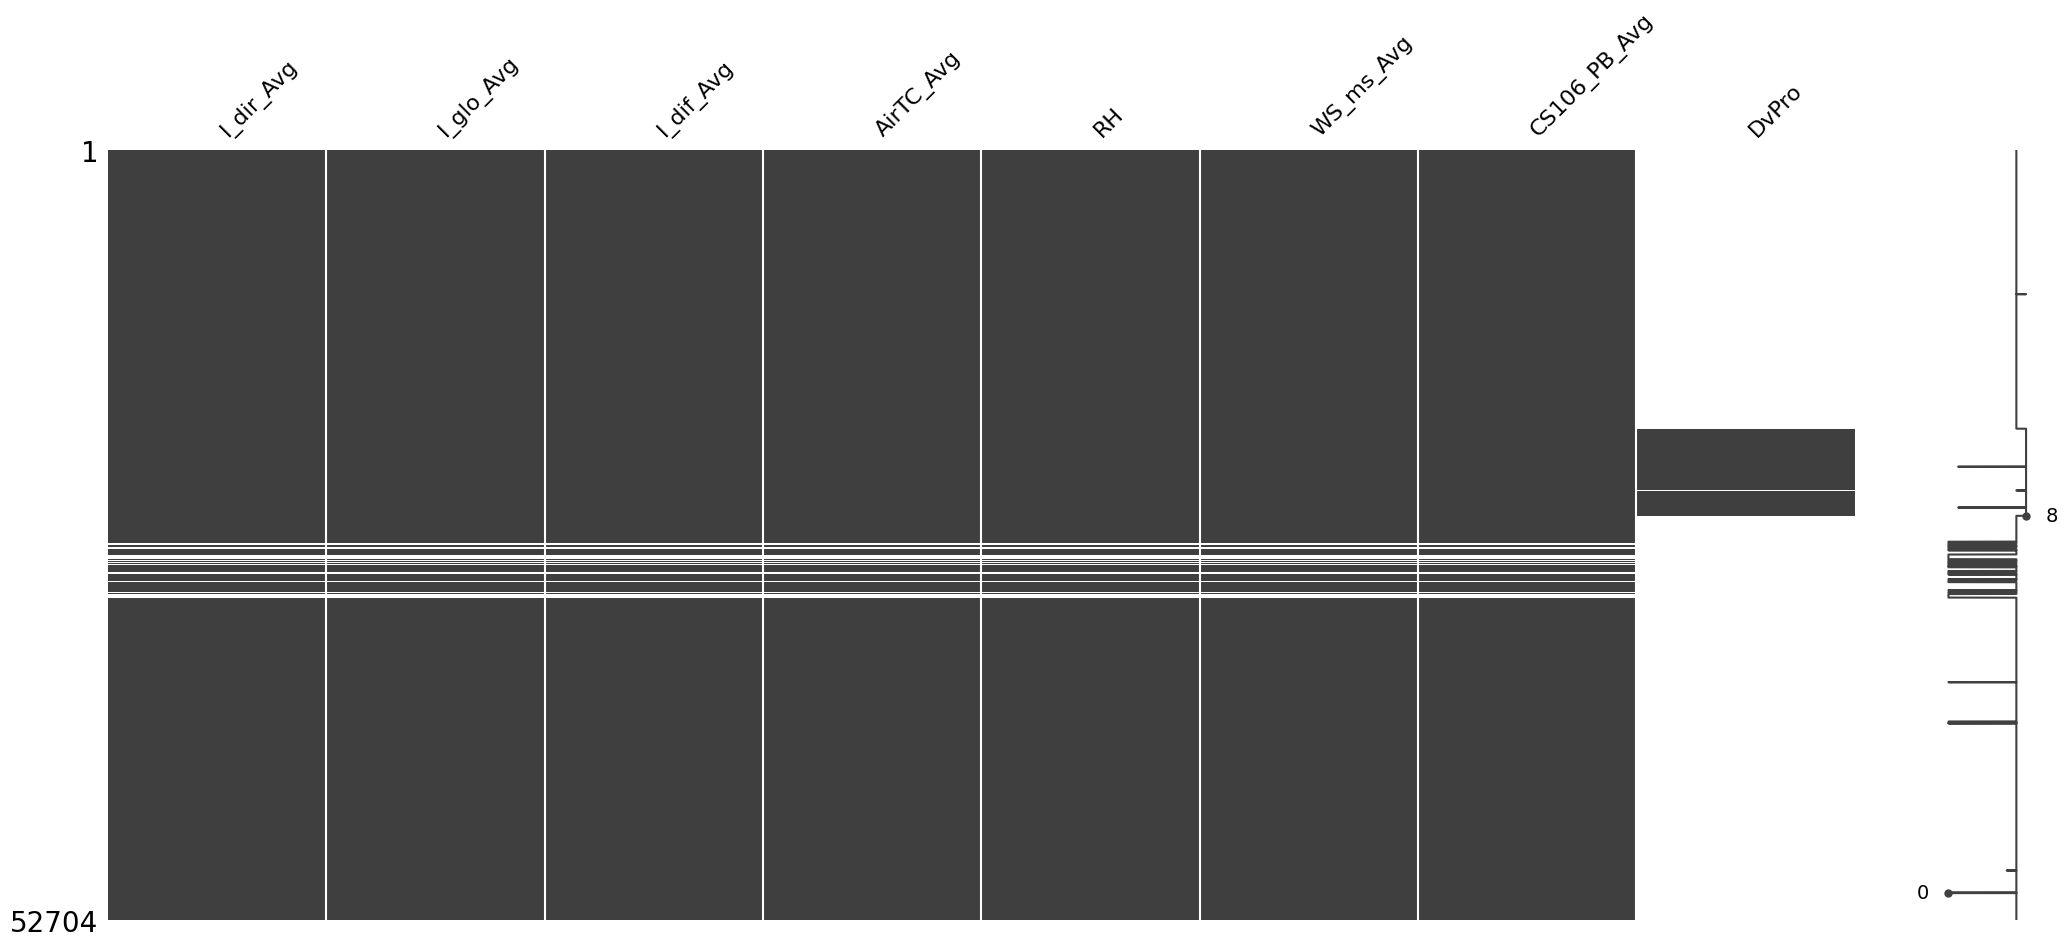

In [11]:
#Perdida de datos.
msno.matrix(esolmet_a)
#Podemos ver que en este año, los valores de direccion de velocidad no aporta nada de datos, hay demasiados espacios. 
#Por tal, esos datos no proporcionarán resultados buenos durante todo un año, sino más bien específiciso. 

<Axes: >

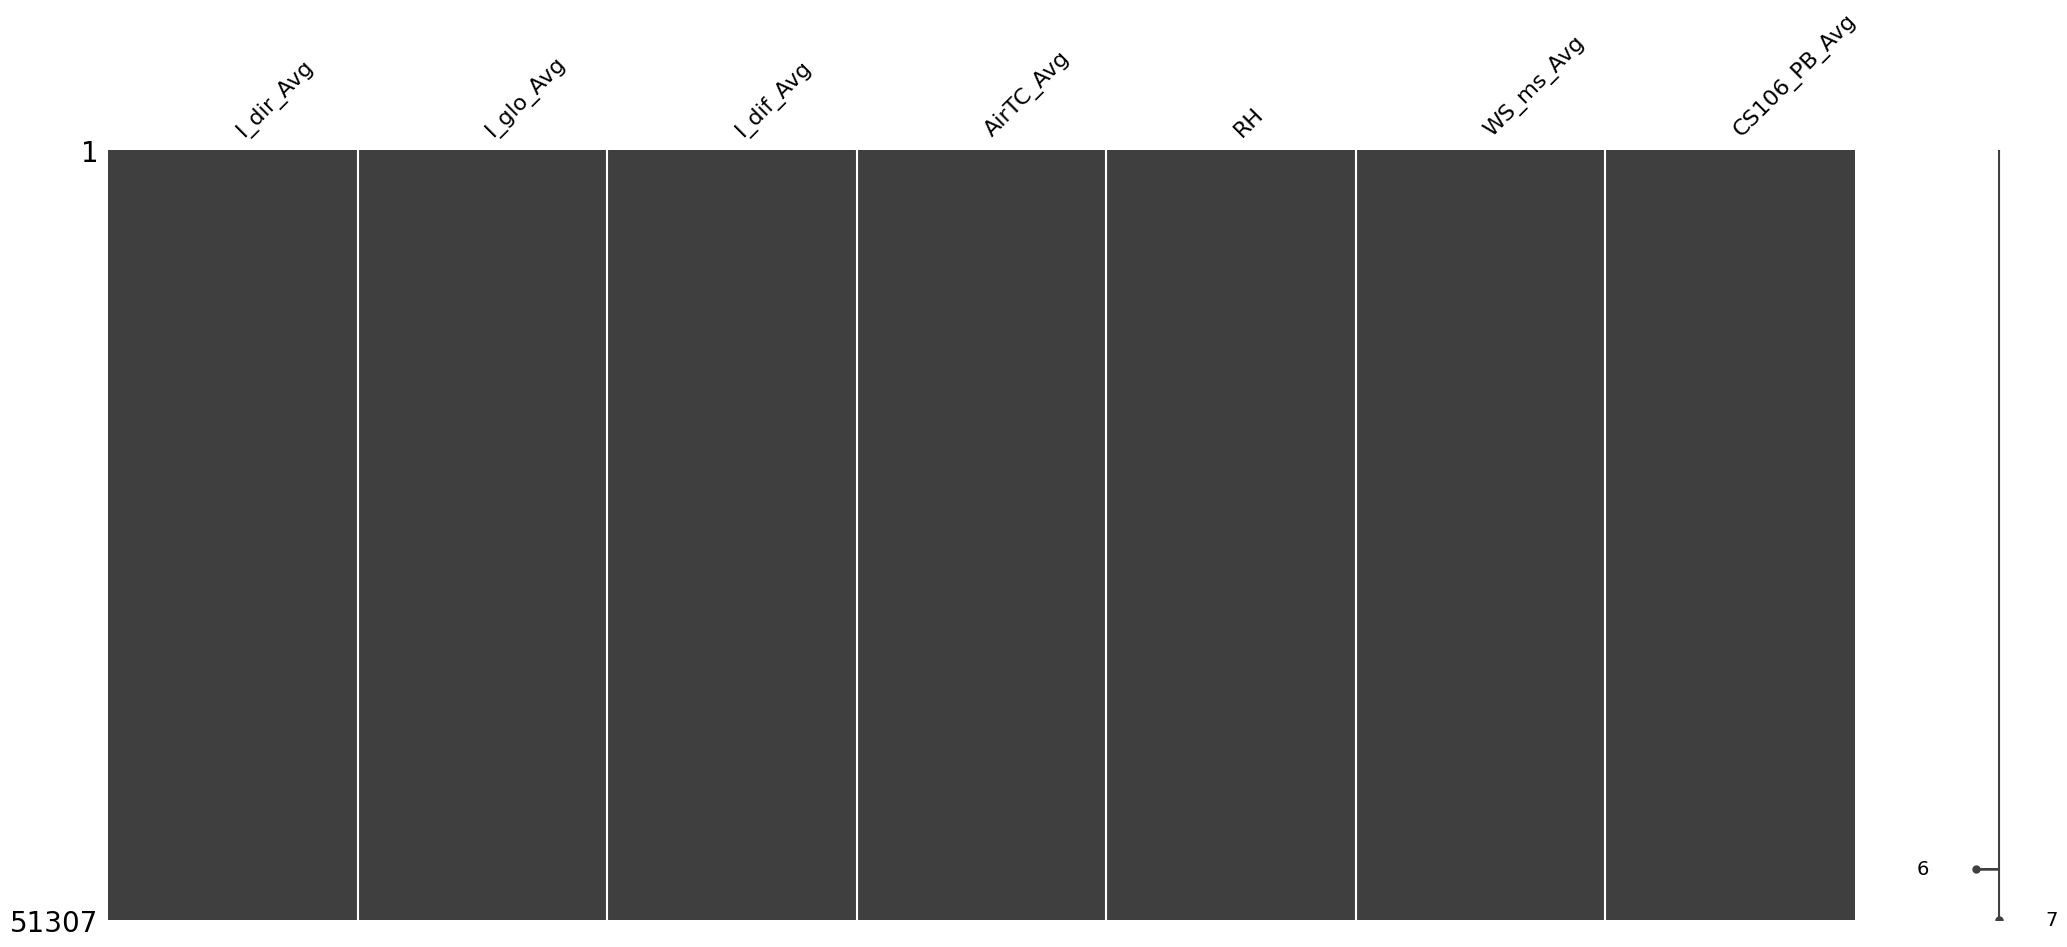

In [12]:
msno.matrix(esolmet18)

In [13]:
esolmet_a.columns

Index(['I_dir_Avg', 'I_glo_Avg', 'I_dif_Avg', 'AirTC_Avg', 'RH', 'WS_ms_Avg',
       'CS106_PB_Avg', 'DvPro'],
      dtype='object')

In [14]:
nuevo_orden = ['I_glo_Avg', 'I_dif_Avg', 'I_dir_Avg','WS_ms_Avg', 'AirTC_Avg', 'RH', 'CS106_PB_Avg']

esolmet18 = esolmet18.reindex(columns=nuevo_orden)
esolmet18.index.name = 'Fecha'
esolmet18

,I_glo_Avg,I_dif_Avg,I_dir_Avg,WS_ms_Avg,AirTC_Avg,RH,CS106_PB_Avg
Fecha,,,,,,,
2017-11-01 00:00:00,0.0,0.0,0.000,1.158,21.02,66.28,876.6721
2017-11-01 00:10:00,0.0,0.0,0.000,1.301,20.99,64.07,876.7043
2017-11-01 00:20:00,0.0,0.0,0.090,1.148,21.24,64.13,876.4832
2017-11-01 00:30:00,0.0,0.0,0.000,1.496,20.94,67.71,876.4512
2017-11-01 00:40:00,0.0,0.0,0.042,1.037,21.01,64.30,876.3698
...,...,...,...,...,...,...,...
2018-11-01 23:10:00,0.0,0.0,0.277,0.205,21.28,82.60,877.1297
2018-11-01 23:20:00,0.0,0.0,0.010,0.000,21.22,83.60,877.1385
2018-11-01 23:30:00,0.0,0.0,0.130,0.198,21.02,83.50,877.1710


In [15]:
nombres_nuevos = {'I_dir_Avg': "I_directa", 'I_glo_Avg': "I_global", 'I_dif_Avg': "I_difusa", 'AirTC_Avg': "temp_exterior", 'RH': "humedad_relativa", 'WS_ms_Avg': "wind_speed",
       'CS106_PB_Avg': "presion_atm"} ###
esolmet18.rename(columns = nombres_nuevos, inplace=True)
esolmet18

,I_global,I_difusa,I_directa,wind_speed,temp_exterior,humedad_relativa,presion_atm
Fecha,,,,,,,
2017-11-01 00:00:00,0.0,0.0,0.000,1.158,21.02,66.28,876.6721
2017-11-01 00:10:00,0.0,0.0,0.000,1.301,20.99,64.07,876.7043
2017-11-01 00:20:00,0.0,0.0,0.090,1.148,21.24,64.13,876.4832
2017-11-01 00:30:00,0.0,0.0,0.000,1.496,20.94,67.71,876.4512
2017-11-01 00:40:00,0.0,0.0,0.042,1.037,21.01,64.30,876.3698
...,...,...,...,...,...,...,...
2018-11-01 23:10:00,0.0,0.0,0.277,0.205,21.28,82.60,877.1297
2018-11-01 23:20:00,0.0,0.0,0.010,0.000,21.22,83.60,877.1385
2018-11-01 23:30:00,0.0,0.0,0.130,0.198,21.02,83.50,877.1710


In [16]:
#Guardo el archivo .parquet. 
esolmet18.to_parquet("../data/002_process/esolmet18_completo.parquet")
#documento con direccion de viento.
esolmet_a.to_parquet("../data/002_process/esolmet18_a_completo.parquet")